# Фибоначчи.!

In [22]:
def fib(n):
    a, b = 0, 1
    for i in range(2,n+1):
        a, b = b, b+a
        
    return(b)

def main():
    n = int(input())
    print(fib(n))


if __name__ == "__main__":
    main()

10
55


In [26]:
def fib(n):
    a, b = 0, 1
    for i in range(2,n+1):
        a, b = b, (a+b)%10
        
    return(b)

def main():
    n = int(input())
    print(fib(n))


if __name__ == "__main__":
    main()

10
5


In [5]:
def fib_mod(n, m):

    a, b = 0, 1
    c = [a%m, b%m]
    
    for i in range(2,n+1):
        a, b = b, (a+b)
        c.append(b%m)
        if c[-2:] == c[:2]:
            return(c[n%(len(c)-2)])
    return(c[n])

def main():
    n, m = map(int, input().split())
    print(fib_mod(n, m))


if __name__ == "__main__":
    main()

1 4
1


In [49]:
def fib_mod(n, m):

    
    c = [0, 1]
    
    for i in range(2,n+1):
        c += [c[i-2] + c[i-1]]
        if ((c[0]%m) == (c[-2]%m)) & ((c[1]%m) == (c[-1]%m)):
            return(c[n%(len(c)-2)]%m)
    return(c[n]%m)

def main():
    n, m = map(int, input().split())
    print(fib_mod(n, m))


if __name__ == "__main__":
    main()

16 4
3


In [33]:
def fib_mod(n, m):

    a, b = 0, 1
    c = [a%m, b%m]
    
    for i in range(2,n+1):
        a, b = b, (a+b)
        c += [b%m]
        if c[-2:] == c[:2]:
            return(c[n%(len(c)-2)])
    return(c[n])

def main():
    n, m = map(int, input().split())
    for i in range(n):
        print(fib_mod(i, m))


if __name__ == "__main__":
    main()

20 4
0
1
1
2
3
1
0
1
1
2
3
1
0
1
1
2
3
1
0
1


# НОД.!

In [54]:
def nod(a,b):
    if a == 0:
        return b
    elif b == 0:
        return a
    elif a >= b:
        return nod(a%b,b)
    elif b >= a:
        return nod(a,b%a)
    
nod(3918848,1653264)

61232

In [56]:
def gcd(a, b):
    while b:
        a,b = b, a%b
    return(a)

def main():
    a, b = map(int, input().split())
    print(gcd(a, b))


if __name__ == "__main__":
    main()

10 2
2


In [34]:
import math
n=100
print(math.sqrt(math.log(n, 4)))
print(math.log(math.log(n, 2)))
print(math.log(n, 3))
print(math.sqrt(n))
print(n / math.log(n, 5))
print(math.log(n, 2) ** 2)
print(math.log(math.factorial(n),2))
print(3 ** math.log(n, 2))
print(n ** 2)
print(math.log(n, 2) ** (math.log(n, 2)))
print(7 ** (math.log(n, 2)))
print(n ** (math.log(n, 2)))
print(n ** (math.sqrt(n)))
print(2 ** n)
print(4 ** n)
print(2 ** (3 * n))
print(math.factorial(n))
# print(2 ** (2 ** n))
n ** (math.sqrt(n)) > 2 ** n

TypeError: must be real number, not list

<Figure size 432x288 with 0 Axes>

# Практика на Python.!

#### Интро по декораторам.!

In [99]:
def another_stand_alone_function():
    print("Оставь меня в покое")

def my_shiny_new_decorator(function_to_decorate):
        def the_wrapper_around_the_original_function():
    
            print("Я - код, который отработает до вызова функции")
            function_to_decorate()
            print("А я - код, срабатывающий после")

        return the_wrapper_around_the_original_function

@my_shiny_new_decorator
def another_stand_alone_function():
    print("Оставь меня в покое")
    
another_stand_alone_function() 

# ну или:

another_stand_alone_function = my_shiny_new_decorator(another_stand_alone_function)

Я - код, который отработает до вызова функции
Оставь меня в покое
А я - код, срабатывающий после


#### Возня Фибоначчи с декораторами.!

In [111]:
def fib1(n):
    assert n>= 0
    return n if n <= 1 else fib1(n - 2) + fib1(n - 1)
old_fib1 = fib1 # Сохранили оригинальный fib1 для возвращения из декорирования
fib1(8)

21

In [51]:
cache = {}

def fib2(n): 
    assert n>= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n-2) + fib2(n-1)
    return cache[n]

fib2(80)

23416728348467685

In [52]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

In [85]:
@memo
def fib1(n):
    assert n>= 0
    return n if n <= 1 else fib1(n - 2) + fib1(n - 1)

fib1(80)


fib1 = memo(fib1)
fib1(80)

23416728348467685

In [58]:
def fib3(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n - 1):
        f0, f1 = f1, f0 + f1
    return f1

In [121]:
import time

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [103]:
timed(fib3, 800) #время выполнения fib3 для 800го Фибоначчи

3.999999989900971e-05

#### Сравнение скорости работ функций.!

In [122]:
from matplotlib import pyplot as plt

def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

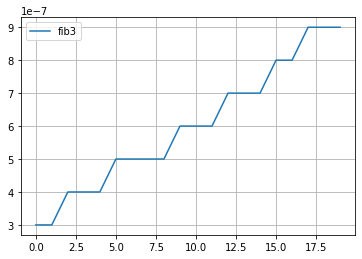

In [132]:
# fib1 = memo(fib1)
fib1 = old_fib1

compare([fib3], list(range(20)))

In [135]:
import random

def test(gcd, n_iter=100):
    for i in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(b, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0